Assignment 1

Implementing a Deep Neural Neetwork for Linear Regression task of Boston House Price Prediction using the Boston Housing Dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("BostonHousing.csv")
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
x = df.loc[:, df.columns != 'medv']
y = df.loc[:, df.columns == 'medv']
xtrain, xtest, ytain, ytest = train_test_split(x, y, test_size=0.3, random_state=123) 

In [5]:
mms = MinMaxScaler()
mms.fit(xtrain)
xtrain = mms.transform(xtrain)
xtest = mms.transform(xtest)
xtrain[:5], xtest[:5]

(array([[2.34782498e-03, 2.00000000e-01, 2.38269795e-01, 1.00000000e+00,
         1.50313152e-01, 7.99767622e-01, 4.87234043e-01, 2.91802800e-01,
         8.69565217e-02, 6.87022901e-02, 6.38297872e-01, 9.84542841e-01,
         1.37588652e-01],
        [4.56256121e-04, 2.10000000e-01, 1.89882698e-01, 0.00000000e+00,
         9.81210856e-02, 5.71262587e-01, 1.60638298e-01, 5.15231716e-01,
         1.30434783e-01, 1.06870229e-01, 4.46808511e-01, 1.00000000e+00,
         1.00709220e-01],
        [6.28012552e-04, 0.00000000e+00, 7.33137830e-02, 0.00000000e+00,
         2.00417537e-01, 5.00193648e-01, 5.97872340e-01, 1.30395897e-01,
         8.69565217e-02, 1.14503817e-02, 5.53191489e-01, 1.00000000e+00,
         2.19007092e-01],
        [5.70703456e-02, 0.00000000e+00, 6.46627566e-01, 0.00000000e+00,
         6.70146138e-01, 5.29821844e-01, 9.12765957e-01, 1.09432895e-01,
         1.00000000e+00, 9.14122137e-01, 8.08510638e-01, 9.70220384e-01,
         4.40851064e-01],
        [1.78291606e

In [6]:
model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation="relu", name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(xtrain, ytain, epochs=100, validation_split=0.05, verbose=1)

Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 596.0282 - mae: 22.5980 - val_loss: 614.1512 - val_mae: 22.8721
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 560.6514 - mae: 21.7605 - val_loss: 574.5919 - val_mae: 21.9594
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 512.9732 - mae: 20.5993 - val_loss: 512.7526 - val_mae: 20.4466
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 440.4029 - mae: 18.6162 - val_loss: 418.9331 - val_mae: 17.8799
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 335.7659 - mae: 15.5699 - val_loss: 300.9666 - val_mae: 14.1218
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 229.5830 - mae: 12.0091 - val_loss: 191.5252 - val_mae: 9.9880
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 154.9125 - mae: 9.6723 - val_loss: 139.2298 - val_mae: 8.5410
Epoch 8/100
11/11 [========================

In [8]:
xyz = model.evaluate(xtest, ytest)
# print(xyz)
print("Mean Squared Error:", xyz[0])
print("Mean Absolute Error:", xyz[1])
# print("Mean Squarred Error(test data) :", mse_nn)
# print("Mean Absolute Error(test data) :", mae_nn)


5/5 [==============================] - 0s 4ms/step - loss: 23.2618 - mae: 3.1055
Mean Squared Error: 23.261795043945312
Mean Absolute Error: 3.1054656505584717


<Axes: title={'center': 'loss Curves'}, xlabel='Epochs', ylabel='Loss'>

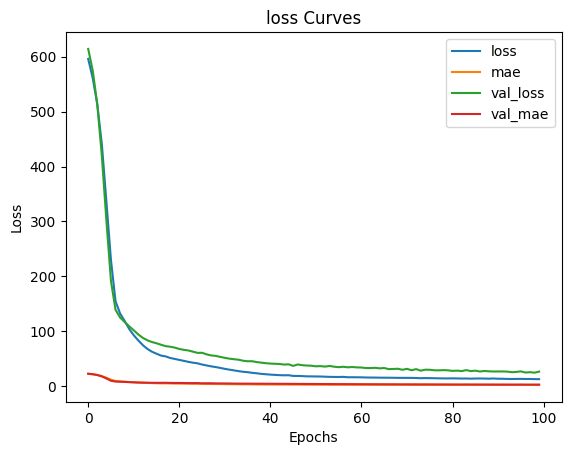

In [9]:
pd.DataFrame(history.history).plot(xlabel="Epochs", ylabel="Loss", title="loss Curves")

In [12]:
y_pred = model.predict(xtest)
y_pred[0]

5/5 [==============================] - 0s 4ms/step


array([12.939798], dtype=float32)